In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [6]:
df = pd.read_csv("../Datasets/nasa.csv")

In [7]:

df["Hazardous"] = (df["Hazardous"] == True).astype(int)
df

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,1
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,0
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,1
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,0
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,0
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,0
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,0
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,0


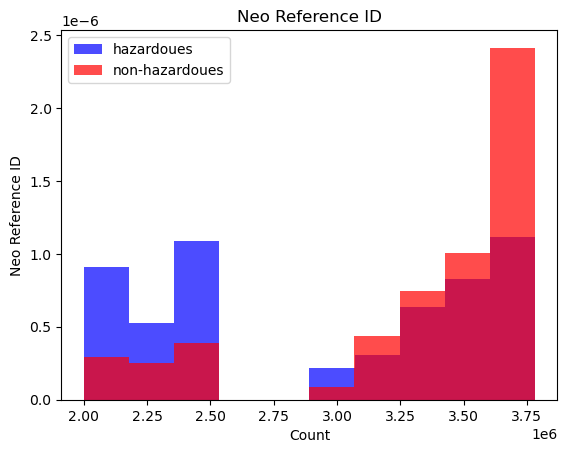

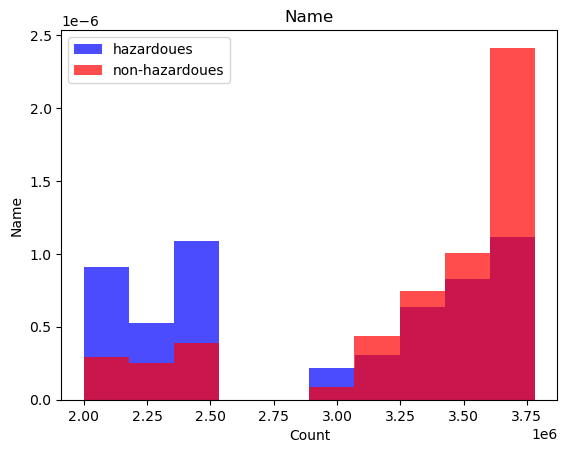

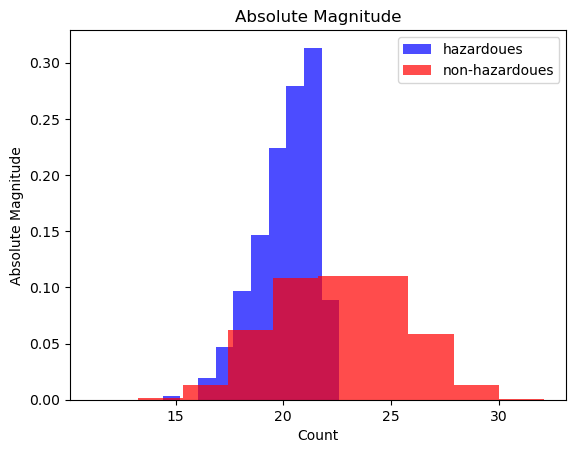

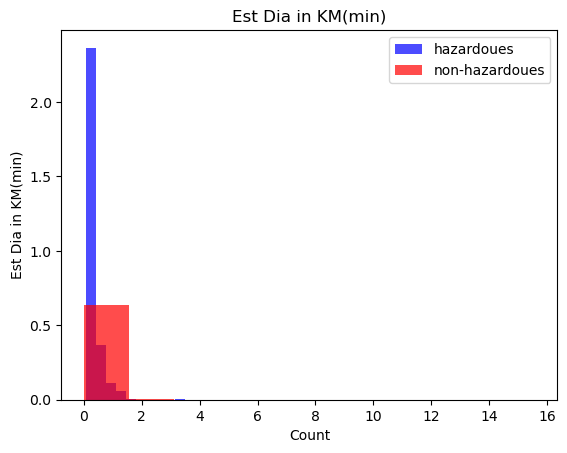

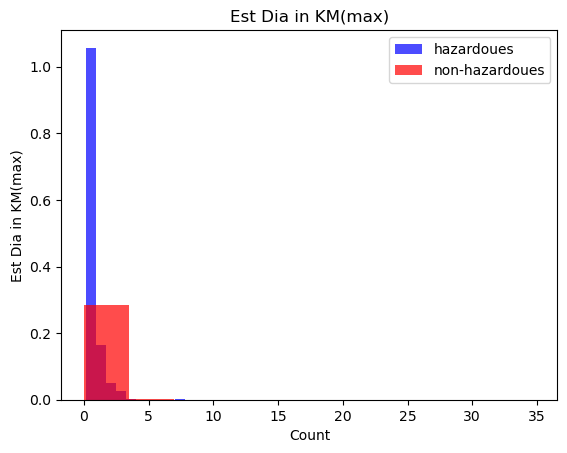

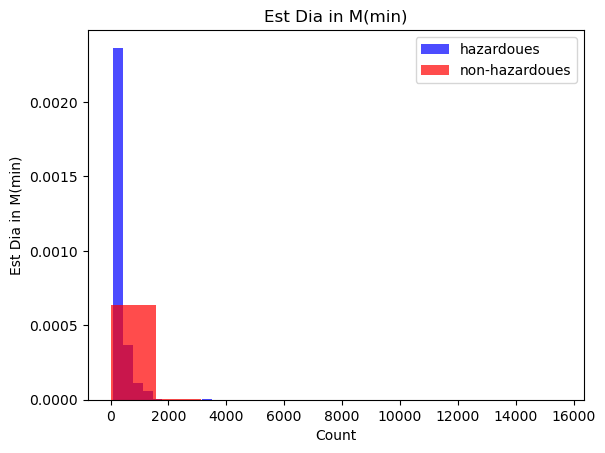

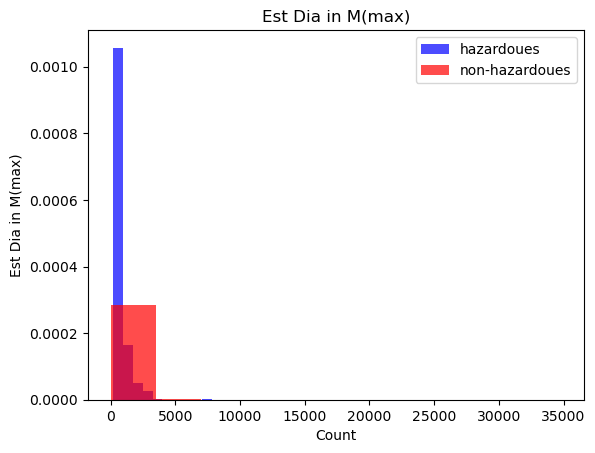

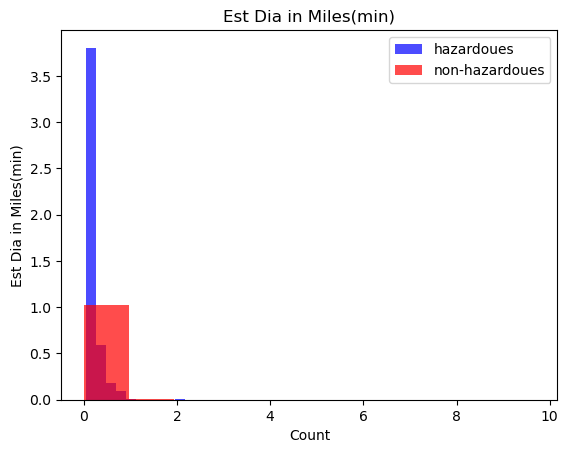

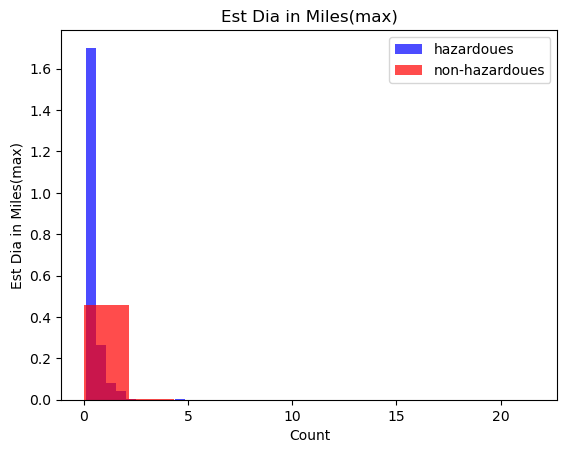

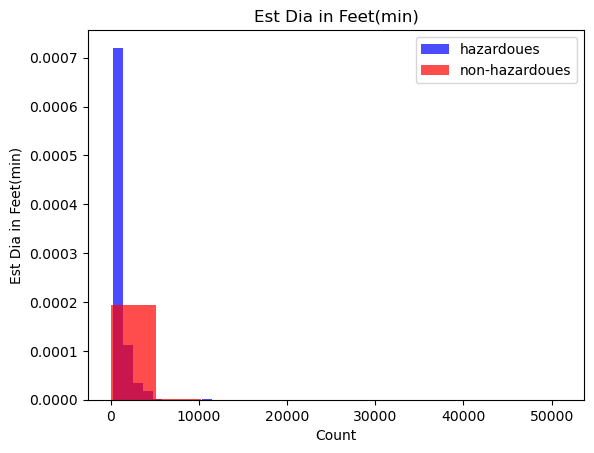

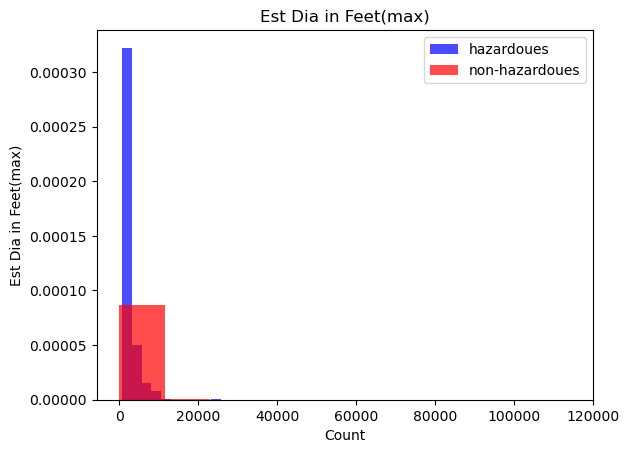

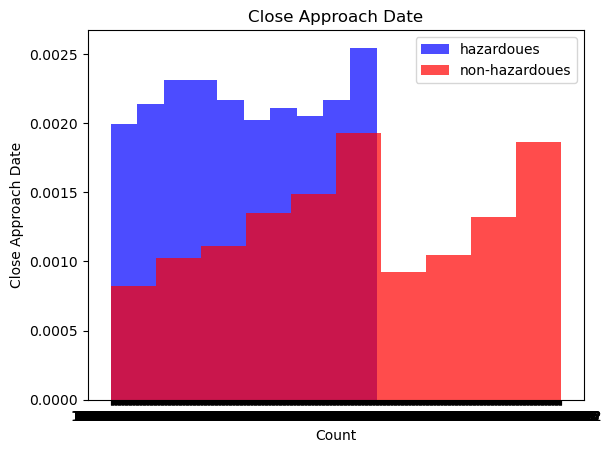

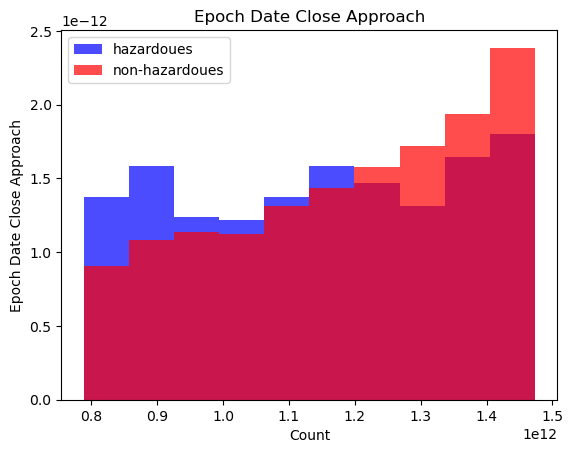

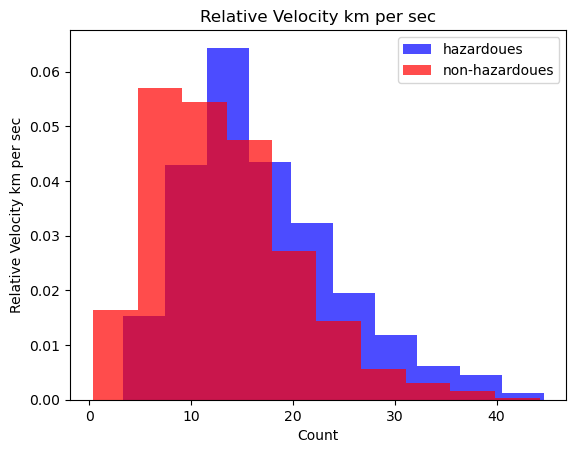

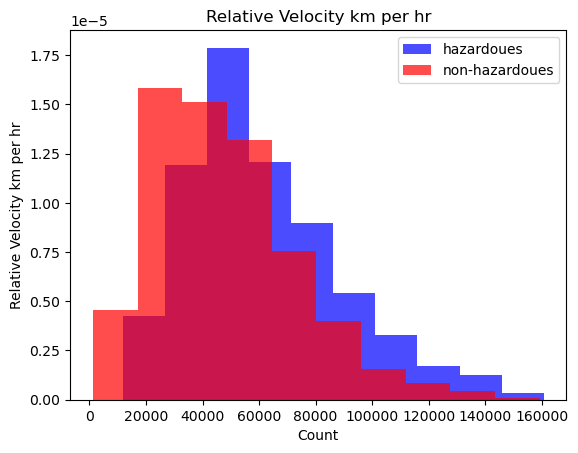

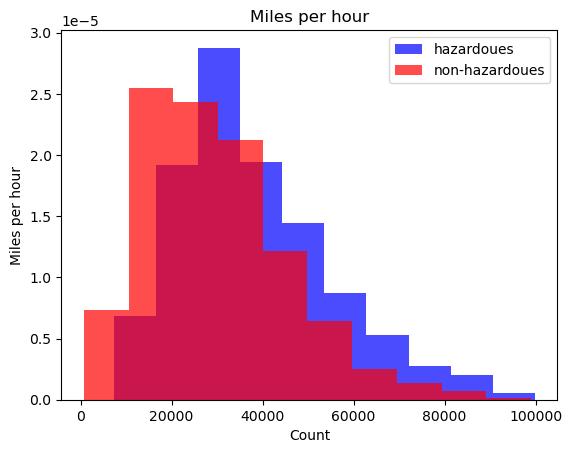

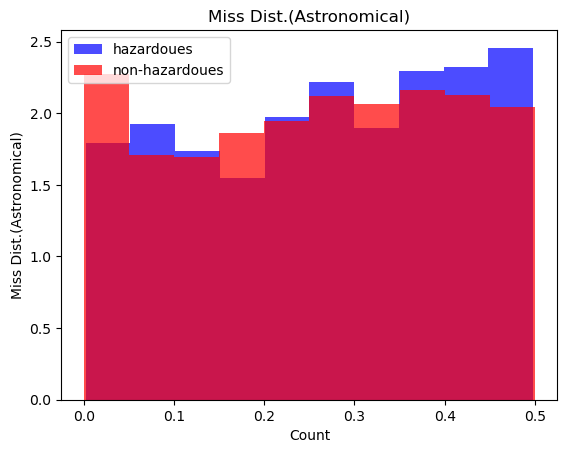

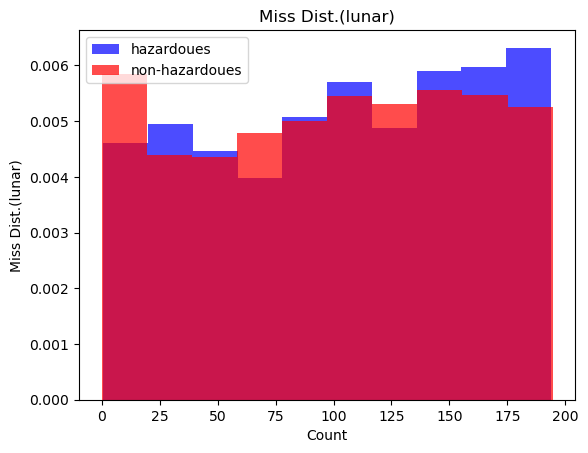

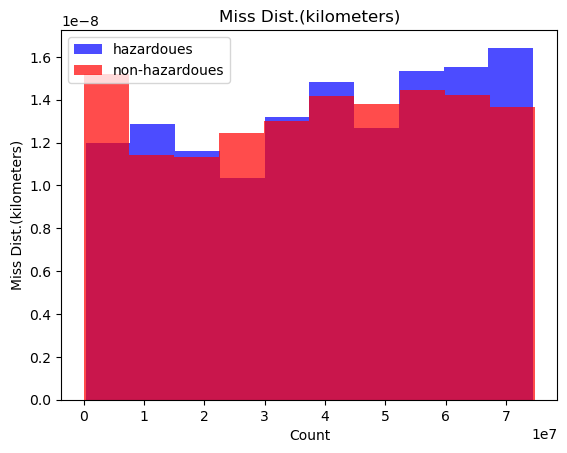

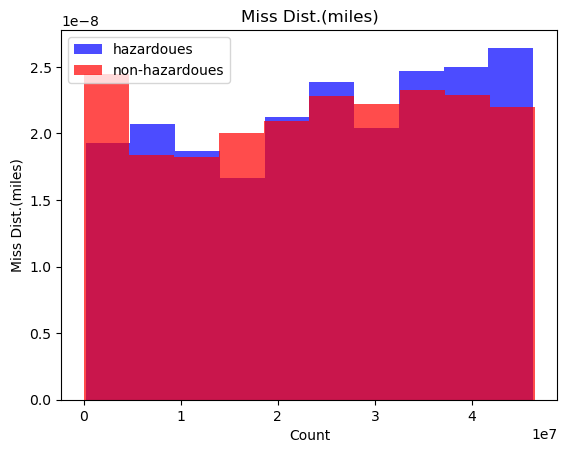

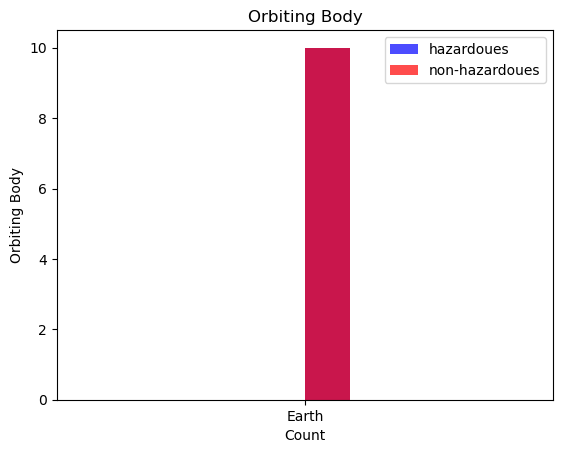

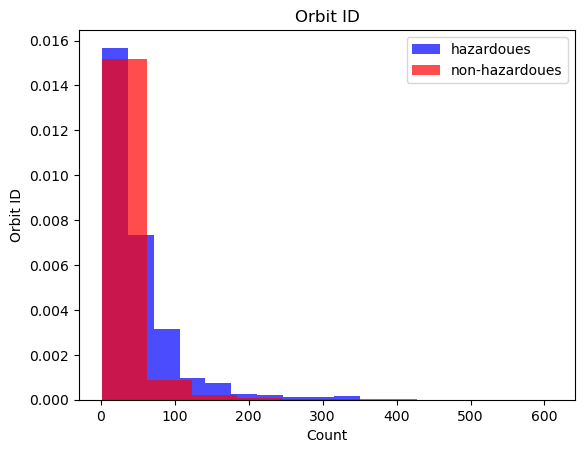

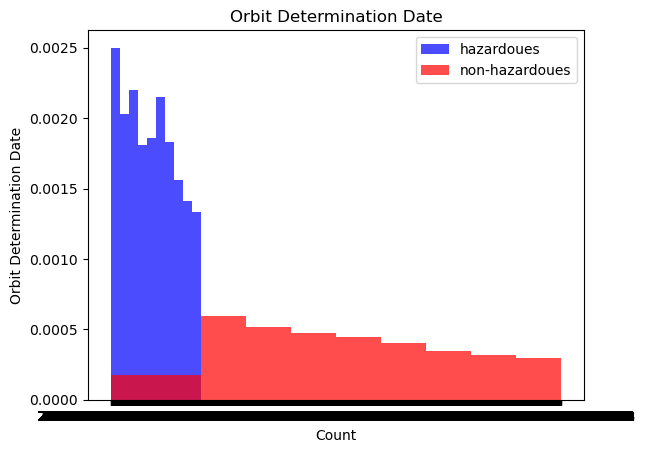

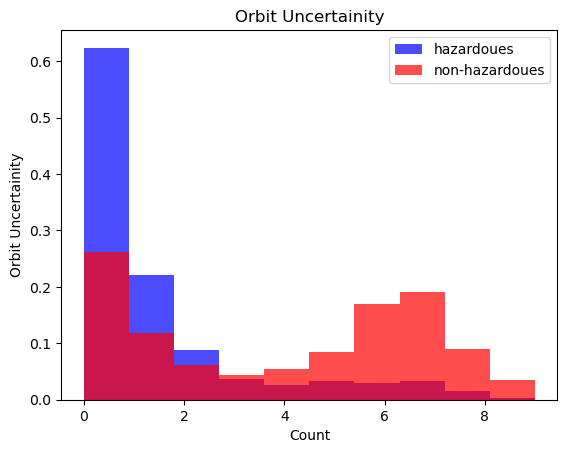

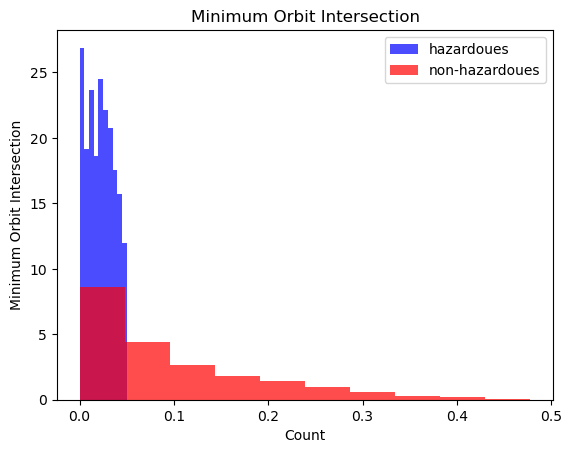

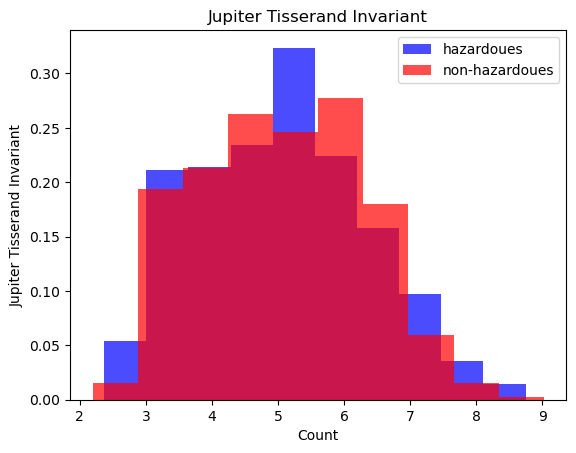

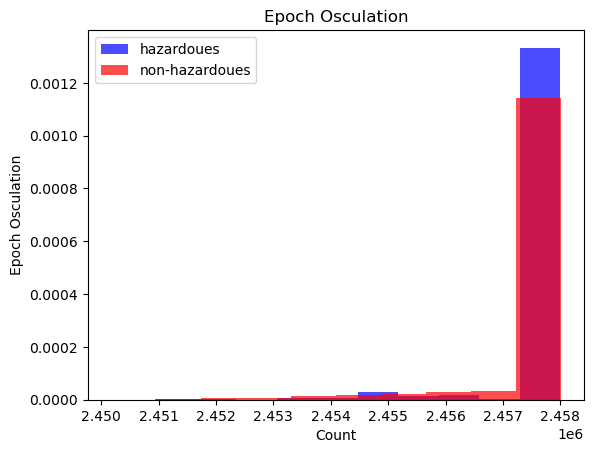

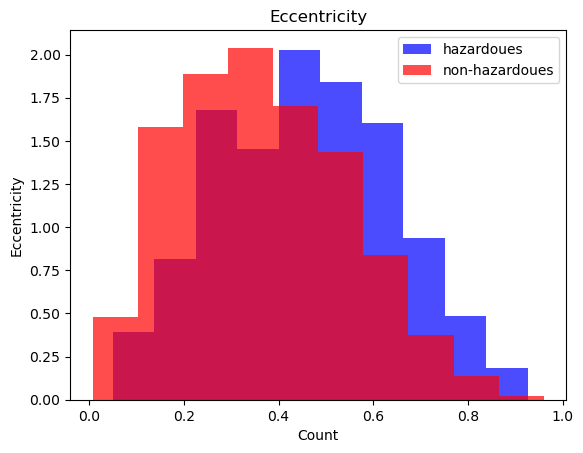

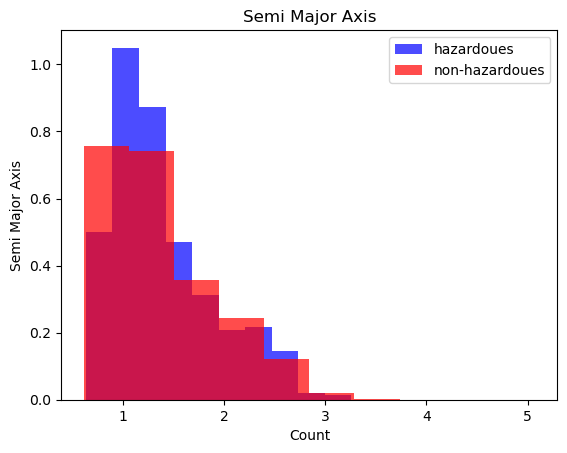

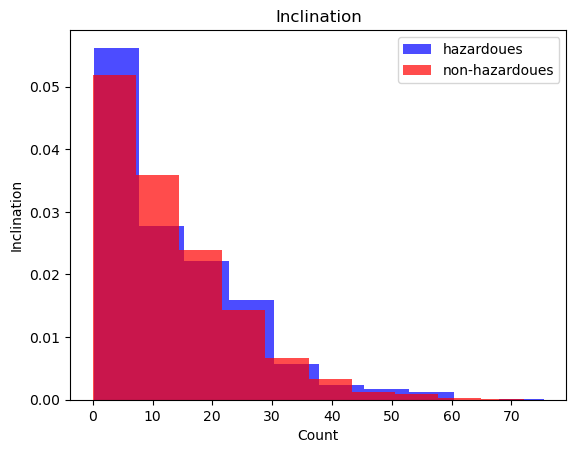

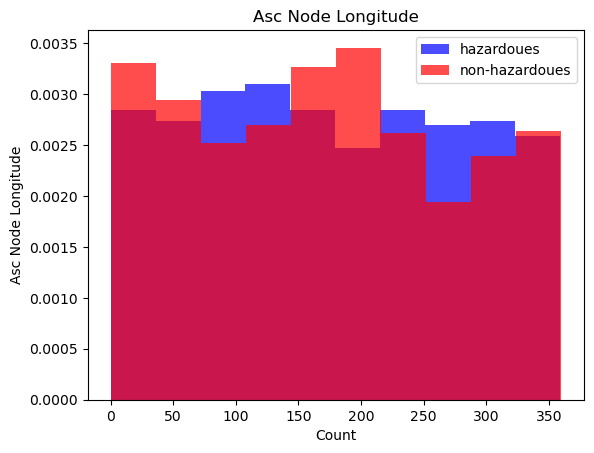

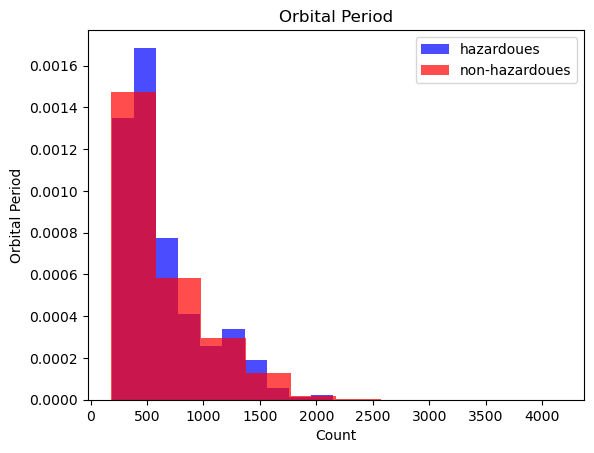

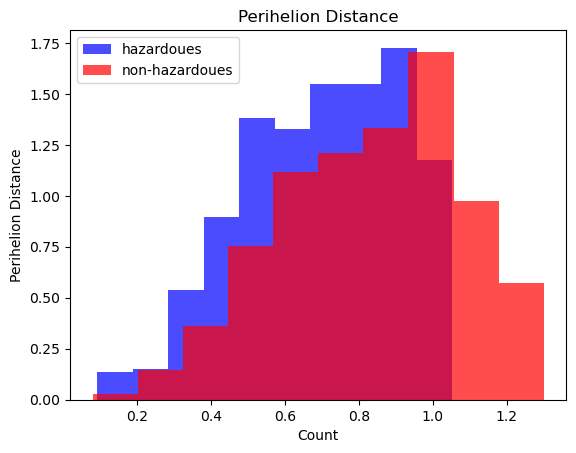

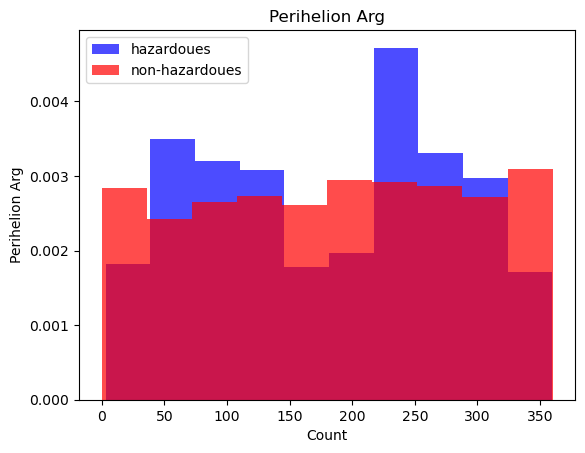

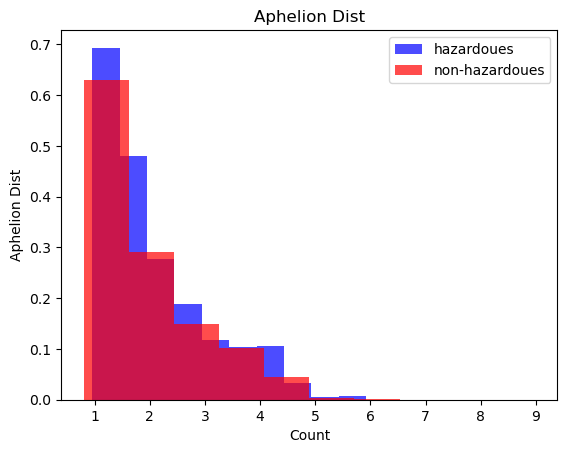

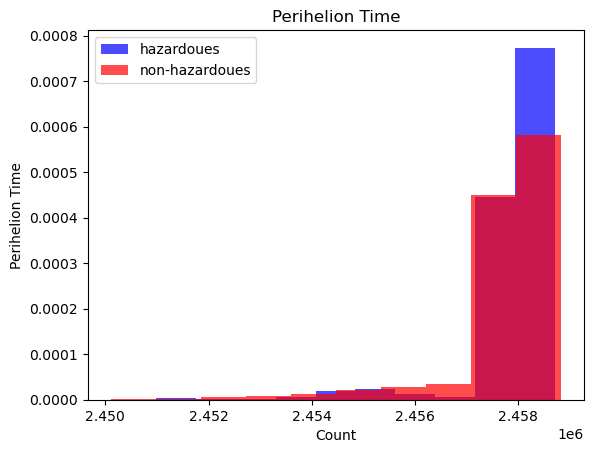

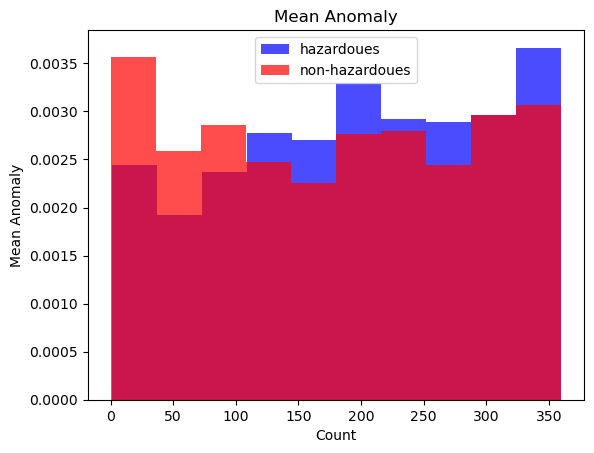

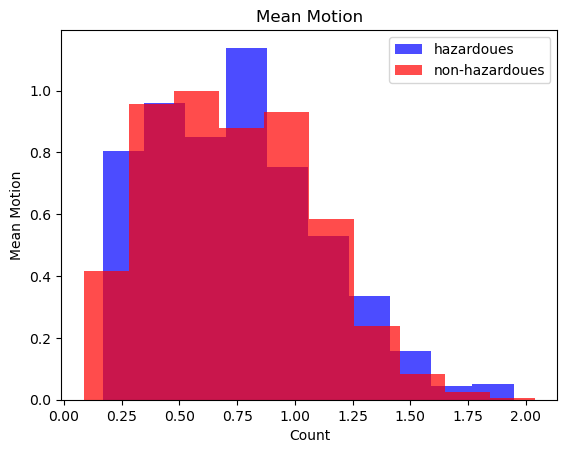

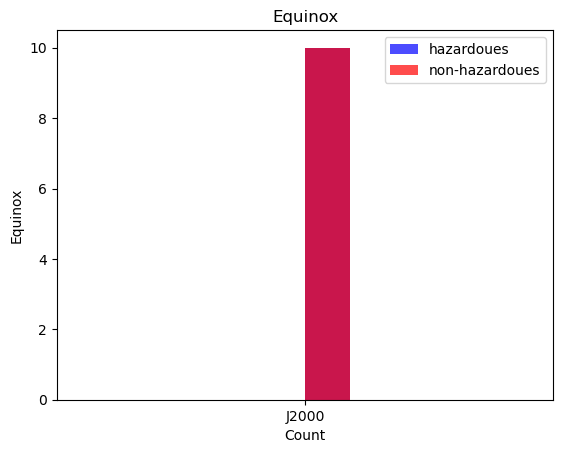

In [8]:
for label in df.columns[:-1]:
  plt.hist(df[df["Hazardous"] == 1][label] , color="blue", label="hazardoues", alpha = 0.7, density=True)
  plt.hist(df[df["Hazardous"] == 0][label] , color="red", label="non-hazardoues", alpha = 0.7, density=True)
  plt.title(label)
  plt.xlabel("Count")
  plt.ylabel(label)
  plt.legend()
  plt.show()

In [9]:
X_mit = df.drop(columns = ['Hazardous', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox'], inplace=False)
y_mit = df['Hazardous']
info_gain = mutual_info_classif(X_mit, y_mit)
feature_info_gain = pd.DataFrame({'Feature': X_mit.columns, 'Information Gain': info_gain})
feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)
print(feature_info_gain)

                         Feature  Information Gain
21    Minimum Orbit Intersection          0.173111
10          Est Dia in Feet(max)          0.125160
5              Est Dia in M(min)          0.120879
7          Est Dia in Miles(min)          0.119943
6              Est Dia in M(max)          0.119911
4             Est Dia in KM(max)          0.119887
2             Absolute Magnitude          0.119413
9           Est Dia in Feet(min)          0.119243
8          Est Dia in Miles(max)          0.118640
3             Est Dia in KM(min)          0.115685
29           Perihelion Distance          0.101467
1                           Name          0.088134
0               Neo Reference ID          0.088027
19                      Orbit ID          0.084600
31                 Aphelion Dist          0.082112
27            Asc Node Longitude          0.076615
22   Jupiter Tisserand Invariant          0.076020
30                Perihelion Arg          0.074872
24                  Eccentricit

In [10]:
Xmit2 = df[['Minimum Orbit Intersection', 'Est Dia in KM(max)', 'Est Dia in KM(min)', 'Absolute Magnitude', 'Perihelion Distance' ]]
ymit2 = df['Hazardous']

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(Xmit2, ymit2, test_size=0.2, random_state=42)

In [11]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_rf, y_train_rf)


RandomForestClassifier(random_state=42)

In [12]:
y_pred_rf = rf_classifier.predict(X_test_rf)

accuracy = accuracy_score(y_test_rf, y_pred_rf)
print(f'Accuracy: {accuracy}')

print(classification_report(y_test_rf, y_pred_rf))

conf_matrix = confusion_matrix(y_test_rf, y_pred_rf)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9957356076759062
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       791
           1       0.99      0.99      0.99       147

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

Confusion Matrix:
[[789   2]
 [  2 145]]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(Xmit2, ymit2, test_size=0.2, random_state=42)

pipelines = {
    'rf': Pipeline([('scaler', StandardScaler()), ('rf', RandomForestClassifier())]),
    'svm': Pipeline([('scaler', StandardScaler()), ('svm', SVC())]),
    'lr': Pipeline([('scaler', StandardScaler()), ('lr', LogisticRegression())]),
}

params_grid = {
    'rf': {'rf__n_estimators': [100, 200], 'rf__max_depth': [None, 10]},
    'svm': {'svm__C': [0.1, 1, 10], 'svm__gamma': ['scale', 'auto']},
    'lr': {'lr__C': [0.1, 1, 10], 'lr__penalty': ['l1', 'l2']},
}

results = {}
for algo, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, params_grid[algo], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    results[algo] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': grid_search.score(X_test, y_test),
    }

# Print results
for algo, result in results.items():
    print(f'Algorithm: {algo}')
    print(f'Best Parameters: {result["best_params"]}')
    print(f'Best Cross-Validation Score: {result["best_score"]}')
    print(f'Test Set Score: {result["test_score"]}')
    print('\n')

Algorithm: rf
Best Parameters: {'rf__max_depth': 10, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.9959985758789498
Test Set Score: 0.9968017057569296


Algorithm: svm
Best Parameters: {'svm__C': 10, 'svm__gamma': 'scale'}
Best Cross-Validation Score: 0.9853287049399198
Test Set Score: 0.9914712153518124


Algorithm: lr
Best Parameters: {'lr__C': 10, 'lr__penalty': 'l2'}
Best Cross-Validation Score: 0.9570520694259012
Test Set Score: 0.9488272921108742




d:\Software\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Software\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Software\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Software\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fi